# 앙상블(Ensemble) - 1. 보팅, 배깅, 랜덤포레스트

# 보팅( Voting Classifier)

### 개별 분류기의 성능과 보팅 분류기의 성능 비교

### 하드보팅 모델 학습 및 예측

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [10]:
# 위스콘식 유방암 데이터세트
from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()
data_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)

In [11]:
# 데이터 살펴보기
X = b_cancer.data
y = b_cancer.target

In [14]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                     random_state=156)

* 로지스틱 회귀, KNN을 기반으로 한 소프트보팅 분류기

In [15]:
# 서로 다른 개별 학습기 생성
lr_clf = LogisticRegression(max_iter=100000)
knn_clf = KNeighborsClassifier(n_neighbors=8)
dt_clf = DecisionTreeClassifier(max_depth=3)

# 앙상블 학습기 생성
vo_clf = VotingClassifier([('LR', lr_clf), ('KNN', knn_clf), ('DT', dt_clf)],
                           voting='soft')

# 앙상블 학습기 학습
vo_clf.fit(X_train,y_train)

train_score = accuracy_score(y_train, vo_clf.predict(X_train))
test_score = accuracy_score(y_test, vo_clf.predict(X_test))

print(train_score, test_score)

0.9758241758241758 0.9473684210526315


In [ ]:
# 앙상블하지 않은 각각의 학습기의 성능을 측정하시오.

## 1) LogisticRegression
lr_clf.fit(X_train, y_train)

train_score = accuracy_score(y_train, y_pred)
test_score = accuracy_score(y_test, y_pred)

## 2) KNeighboers

## 3) DecisionTree


# Random Forest : 와인 데이터셋

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
from sklearn.datasets import load_wine

wine_kaggle = pd.read_csv('/Users/kimminsoo/Desktop/ML/data/data_선형회귀/wine_dataset.csv')
wine_kaggle

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [82]:
wine = wine_kaggle[['alcohol', 'residual_sugar', 'pH', 'style']]
wine.columns = ['alcohol', 'sugar', 'pH', 'style']
wine['style'] = wine['style'].replace('red', 0)
wine['style'] = wine['style'].replace('white', 1)
wine

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_56224/240787092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['style'] = wine['style'].replace('red', 0)
/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_56224/240787092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['style'] = wine['style'].replace('white', 1)


,alcohol,sugar,pH,style
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0
...,...,...,...,...
6492,11.2,1.6,3.27,1
6493,9.6,8.0,3.15,1
6494,9.4,1.2,2.99,1
6495,12.8,1.1,3.34,1


In [88]:
X = wine.iloc[:, :-1]
y = wine.iloc[:, -1]

In [90]:
# 데이터 분할 :test_size=0.2, random_state=42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=42)

In [ ]:
하이퍼 파라미터
n_estimators: 모형(week learner)의 개수, 순차적으로 오류를 보정해 수가 많으면 성능이 일정 수준까지 높아질 수 있으나, 수행 시간이 오래 걸린다는 단점이 있음(디폴트는 100)
min_samples_leaf: 말단 리프 노드의 최소한의 샘플 데이터 수, 디폴트 1
max_depth: 트리의 최대 깊이, 디폴트 3
max_features: 디폴트는 auto, If “auto”, then max_features=sqrt(n_features) 즉, 피처가 4개면 분할을 위해 2개 참조 


In [92]:
# RandomForestClassifier 모델 구축, 학습 및 평가
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

train_score = accuracy_score(y_train, rf_clf.predict(X_train))
test_score = accuracy_score(y_test, rf_clf.predict(X_test))

print(train_score)
print(test_score)



0.996921300750433
0.8892307692307693


### 랜덤 포레스트 하이퍼파라미터 튜닝

In [93]:
# 과대적합이므로 그리드서치
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200,300,400,500],
    'max_depth': [3,5,7,9,11],
    'min_samples_leaf': [8,12,18],
    'min_samples_split': [8,16,20]
}
grid = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [94]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 500}

In [95]:
best = grid.best_estimator_

In [96]:
train_score = accuracy_score(y_train, best.predict(X_train))
test_score = accuracy_score(y_test, best.predict(X_test))

print(train_score)
print(train_score)

0.8964787377333077
0.8964787377333077


* [참고] 트리 갯수 300개로 증가시킨후 학습 -> 별도의 테스트 데이터셋에서 예측 -> 성능측정

### 특성 중요도(feature importances)

<AxesSubplot: >

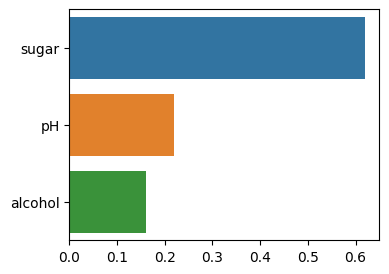

In [97]:
f_imp = pd.Series(data=best.feature_importances_, 
          index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(4,3))
sns.barplot(x=f_imp.values, y=f_imp.index)

# [실습]  사용자 행동 인식 데이터 세트 랜덤포레스트 분류하라
(기본 모델 -> 하이퍼파라미터 튜닝 -> 피처 중요도 시각화)

### 랜덤 포레스트 하이퍼 파라미터 튜닝

### 피처별 중요도 시각화

# 실습] 타이타닉 데이터셋 랜덤 포레스트 분류
기본 모델 - 하이퍼파라미터 튜닝 - 특성 중요도 시각화

In [108]:
titanic = pd.read_csv('/Users/kimminsoo/seaborn-data/titanic.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [111]:
titanic = titanic[['pclass', 'sex', 'class', 'survived']]
titanic.columns = ['pclass', 'sex', 'class', 'survived']
titanic['sex'] = titanic['sex'].replace('female', 0)
titanic['sex'] = titanic['sex'].replace('male', 1)
titanic['class'] = titanic['class'].replace('First', 1)
titanic['class'] = titanic['class'].replace('Second', 2)
titanic['class'] = titanic['class'].replace('Third', 3)
titanic

,pclass,sex,class,survived
0,3,1,3,0
1,1,0,1,1
2,3,0,3,1
3,1,0,1,1
4,3,1,3,0
...,...,...,...,...
886,2,1,2,0
887,1,0,1,1
888,3,0,3,0
889,1,1,1,1


In [112]:
X = titanic.iloc[:, :-1]
y = titanic.iloc[:, -1]

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42)

### 하이퍼 파라미터

In [98]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [114]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

train_score = accuracy_score(y_train, rf_clf.predict(X_train))
test_score = accuracy_score(y_test, rf_clf.predict(X_test))

print(train_score)
print(test_score)

0.7921348314606742
0.7653631284916201


In [115]:
# GridSearchCV()를 활용한 최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [3,5,7,9,11],
    'min_samples_leaf': [8,12,18],
    'min_samples_split': [8,16,20]
}
grid = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [116]:
grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [117]:
best = grid.best_estimator_

In [118]:
train_score = accuracy_score(y_train, best.predict(X_train))
test_score = accuracy_score(y_test, best.predict(X_test))

print(train_score)
print(train_score)

0.7921348314606742
0.7921348314606742


### 특성 중요도

# 실습] 와인데이터셋 랜덤포레스트 분류하기
기본 모델 -> 튜닝 -> 점수 ->  특성 중요도 시각화